# kNN Modelling Exploration

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from os.path import expanduser

In [5]:
#fname = expanduser('~/datasets/busdata/modelling/base_table_pre_final.csv')
fname = '/Users/andrew/Downloads/base_table_final.csv'

**This is pretty slow, and reading the entire dataset into a dataframe is just infeasible past the exploration stage. TODO: research better alternatives for large datasets.**

_Ref:_
http://scikit-learn.org/stable/modules/scaling_strategies.html

Possible Keywords: 
- out-of-core processing
- numpy.memmap
- HDF data format (maybe...???)


In [6]:
df = pd.read_csv(fname)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3042017.0,1.521008e+06,878154.811252,0.000000e+00,7.605040e+05,1.521008e+06,2.281512e+06,3.042016e+06
Timestamp,3042017.0,1.352454e+09,175947.448258,1.352160e+09,1.352302e+09,1.352449e+09,1.352584e+09,1.352765e+09
Vehicle_Journey_ID,3042017.0,9.696772e+03,60889.858865,1.000000e+00,2.871000e+03,5.141000e+03,7.124000e+03,9.998250e+05
Lon_WGS84,3042017.0,-6.271001e+00,0.079564,-6.615050e+00,-6.309220e+00,-6.264577e+00,-6.229991e+00,-6.053133e+00
Lat_WGS84,3042017.0,5.334274e+01,0.049894,5.307033e+01,5.331896e+01,5.334451e+01,5.337141e+01,5.360647e+01
Delay,3042017.0,5.025445e+01,416.403834,-8.958000e+03,-1.550000e+02,1.100000e+01,2.230000e+02,1.518800e+04
Stop_ID,3042017.0,2.282713e+03,1871.848917,2.000000e+00,7.950000e+02,1.762000e+03,3.224000e+03,7.549000e+03
At_Stop,3042017.0,2.861342e-01,0.451953,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Distance_Terminal,3042017.0,1.058995e+04,6821.201121,0.000000e+00,4.960000e+03,9.726000e+03,1.556700e+04,3.532900e+04
Trip_Time,3042017.0,2.092092e+03,1397.772036,0.000000e+00,9.690000e+02,1.858000e+03,3.000000e+03,1.076500e+04


### The most simple of models

In [7]:
x = df[['Distance_Terminal']]
y = df['Trip_Time']

x_train, x_test, y_train, y_test = train_test_split(x, y)

# n_neighbours selected for no particular reason
# 'kd_tree' provides faster lookups / scalability than 'brute'. 'ball_tree' could be faster still, 
# but probably only if there's > ~20 dimension

knn = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree').fit(
                        x_train, y_train)

# See some details
print(knn)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')


In [8]:
y_pred = knn.predict(x_test)
print('{:,}'.format(metrics.mean_squared_error(y_test, y_pred)))

413,546.1787289367


_well that doesn't look too good!_

Some further exploration...

#### Actual dist vs time values for test dataset

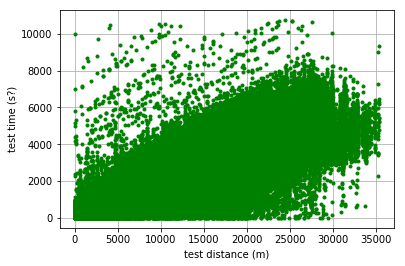

In [21]:
plt.plot(x_test, y_test, 'g.')

# https://stackoverflow.com/questions/37470734/python-matplotlib-giving-error-overflowerror-in-draw-path-exceeded-cell-bloc
mpl.rcParams['agg.path.chunksize'] = 10000

plt.xlabel('test distance (m)')
plt.ylabel('test time (s?)')
plt.grid(True)
plt.show()

#### Predicted time values for given dist

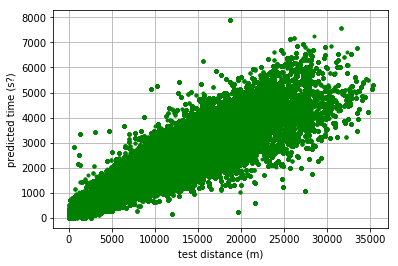

In [22]:
plt.plot(x_test, y_pred, 'g.')

# https://stackoverflow.com/questions/37470734/python-matplotlib-giving-error-overflowerror-in-draw-path-exceeded-cell-bloc
mpl.rcParams['agg.path.chunksize'] = 10000

plt.xlabel('test distance (m)')
plt.ylabel('predicted time (s?)')
plt.grid(True)
plt.show()

#### Predicted time vs actual time

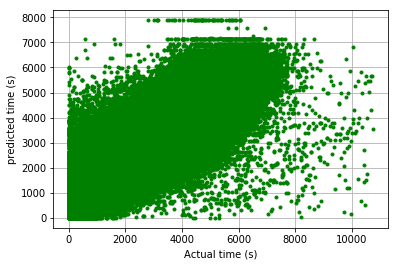

In [23]:
plt.plot(y_test, y_pred, 'g.')

# https://stackoverflow.com/questions/37470734/python-matplotlib-giving-error-overflowerror-in-draw-path-exceeded-cell-bloc
mpl.rcParams['agg.path.chunksize'] = 10000

plt.xlabel('Actual time (s)')
plt.ylabel('predicted time (s)')
plt.grid(True)
plt.show()